# Timeseries of annual mean temperature anomalies

This notebook calculates the global mean temperature anomaly and plot the time series between 2023 and 2045

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

In [2]:
Data = pd.read_csv('../Data/source-data_global_average_temperatures.csv')
Data

,year,Temperature (K),height,Scenarios,Ensemble,Model
0,2015,213.806263,TLS,SSP1-1.9,r10i1p1f1,CanESM5
1,2016,213.639235,TLS,SSP1-1.9,r10i1p1f1,CanESM5
2,2017,213.746636,TLS,SSP1-1.9,r10i1p1f1,CanESM5
3,2018,213.831205,TLS,SSP1-1.9,r10i1p1f1,CanESM5
4,2019,213.508483,TLS,SSP1-1.9,r10i1p1f1,CanESM5
...,...,...,...,...,...,...
149249,2096,292.131805,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3
149250,2097,291.736725,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3
149251,2098,291.702362,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3
149252,2099,291.936188,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3


### Initial Years Mean
We used as reference to calculate the temperature anomalies the average temperature between 2021 and 2025, therefore we start by calculating these reference values.

In [3]:
Initial_years_men = Data.loc[(Data['year'] >= 2021) & (Data['year'] <= 2025)].reset_index(drop = True).groupby(['height', 
                                                                                     'Model', 'Scenarios', 
                                                                                     'Ensemble']).agg({'Temperature (K)': 'mean'}).reset_index() #2021-2025
Initial_years_men.rename(columns = {'Temperature (K)': 'reference_Temperature'}, inplace = True)
Initial_years_men

,height,Model,Scenarios,Ensemble,reference_Temperature
0,GSAT,CanESM5,SSP1-1.9,r10i1p1f1,288.635602
1,GSAT,CanESM5,SSP1-1.9,r10i1p2f1,288.661481
2,GSAT,CanESM5,SSP1-1.9,r11i1p1f1,288.672333
3,GSAT,CanESM5,SSP1-1.9,r11i1p2f1,288.660339
4,GSAT,CanESM5,SSP1-1.9,r12i1p1f1,288.765094
...,...,...,...,...,...
1839,TUS,MIROC6,SSP3-7.0,r5i1p1f1,224.621183
1840,TUS,MIROC6,SSP3-7.0,r6i1p1f1,224.617656
1841,TUS,MIROC6,SSP3-7.0,r7i1p1f1,224.628958
1842,TUS,MIROC6,SSP3-7.0,r8i1p1f1,224.597702


In [4]:
#then we calculate the anamaly bay substracting the reference temperature from each Temperature data point
anomaly_data = pd.merge(Data[['height', 'Model', 
      'Scenarios', 'Ensemble', 'year', 'Temperature (K)']],Initial_years_men, 
                                                                on = ['height', 'Model', 'Scenarios', 'Ensemble'])
anomaly_data['Anomaly (K)'] = anomaly_data['Temperature (K)'] - anomaly_data['reference_Temperature']
anomaly_data

,height,Model,Scenarios,Ensemble,year,Temperature (K),reference_Temperature,Anomaly (K)
0,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2015,213.806263,213.877051,-0.070788
1,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2016,213.639235,213.877051,-0.237816
2,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2017,213.746636,213.877051,-0.130415
3,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2018,213.831205,213.877051,-0.045845
4,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2019,213.508483,213.877051,-0.368567
...,...,...,...,...,...,...,...,...
149249,GSAT,EC-Earth3,SSP3-7.0,r6i1p1f1,2096,292.131805,288.596661,3.535144
149250,GSAT,EC-Earth3,SSP3-7.0,r6i1p1f1,2097,291.736725,288.596661,3.140063
149251,GSAT,EC-Earth3,SSP3-7.0,r6i1p1f1,2098,291.702362,288.596661,3.105701
149252,GSAT,EC-Earth3,SSP3-7.0,r6i1p1f1,2099,291.936188,288.596661,3.339526


## Plotting
Now one can plot the timeseries:


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import FancyBboxPatch
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D 

sns.set_style("ticks") 


In [6]:
## here we difine the colour palette
colours = sns.color_palette() 

models = anomaly_data['Scenarios'].unique() #The colours will diferenciate the scenarios, so here I extract the scenarios labels

#In this piece of code we create a dictionary that links the colours to the scenarios, this dictionary will be used in the sns.lineplot
index = [1,9, 4]
colors_select = []
for i in index:
    colors_select.append(colours[i])

color_models =(dict(zip(models,colors_select)))

#we also need to create an data frame that will hold the parameters to generate the key for the plots
key_labels = ['Scenarios:',]
for ssp in anomaly_data['Scenarios'].unique():
    key_labels.append(ssp)

key_labels.append('Model:')
for model in anomaly_data['Model'].unique():
    key_labels.append(model) 
key_color = [(1, 1, 1),]
for color in colors_select:
    key_color.append(color)

key_color.append((1, 1, 1))
for i in range(len(anomaly_data['Model'].unique())):
    key_color.append((0, 0, 0))

key_style = ['None','-','-','-','None','-','--', ':']


legend_pars = pd.DataFrame({'label':key_labels, 'color': key_color, 'style': key_style})
legend_pars

,label,color,style
0,Scenarios:,"(1, 1, 1)",None
1,SSP1-1.9,"(1.0, 0.4980392156862745, 0.054901960784313725)",-
2,SSP2-4.5,"(0.09019607843137255, 0.7450980392156863, 0.81...",-
3,SSP3-7.0,"(0.5803921568627451, 0.403921568627451, 0.7411...",-
4,Model:,"(1, 1, 1)",None
5,CanESM5,"(0, 0, 0)",-
6,MIROC6,"(0, 0, 0)",--
7,EC-Earth3,"(0, 0, 0)",:


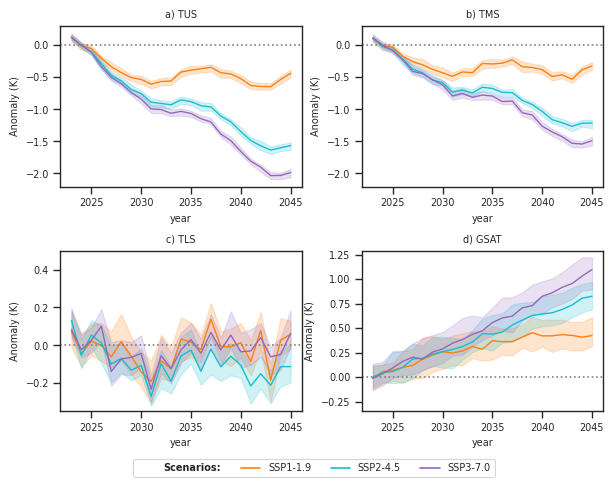

In [7]:
#This is for ploting one single model
sns.set_context("paper")

h_plot = 2
v_plot = 2
x_text = -0.4
y_text = 0.19
text_size = 7

X_var = 'year'
Y_var = 'Anomaly (K)'
hue_var = 'Scenarios'
style_var = 'Models'
xlabel_var = 'year'
ylabel_var = 'Anomaly (K)'

height = ['a) TUS', 'b) TMS', 'c) TLS', 'd) GSAT']
model = 'CanESM5'
model_df = anomaly_data.loc[(anomaly_data['year'] > 2022) & (anomaly_data['year'] <= 2045) & (anomaly_data['Model'] == model)].reset_index(drop = True) #(anomaly_data['year'] > 2022) &  

fig, ax = plt.subplots(v_plot, h_plot, figsize=(7.0, 5))

k = 0

for j in range(v_plot):
    for i in range(h_plot):
        hight_df = model_df.loc[model_df['height'] == height[k].split(' ')[1]]
        sns.lineplot(data = hight_df, 
                     x = X_var, y = Y_var, hue = hue_var, 
                     ax = ax[j,i],
                     # hue_order = models,
                     lw = 1.0,
                     palette = color_models,
                     errorbar=("pi", 80), estimator='median'
                    )
        ax[j,i].legend([], [], frameon=False)
        ax[j,i].tick_params(axis='x', labelsize = text_size)
        ax[j,i].tick_params(axis='y', labelsize = text_size)
        ax[j,i].set_xlabel(xlabel_var, fontsize=text_size, fontfamily='sans-serif')
        ax[j,i].set_title(height[k], fontsize=text_size, fontfamily='sans-serif')
        ax[j,i].set_ylabel(ylabel_var, fontsize=text_size, fontfamily='sans-serif')
        # ax[j,i].set_xticks([2023,2040,2060,2080,2100])
        ax[j,i].axhline(y = 0, ls = 'dotted', c = 'gray')
        k = k +1
       
# ########################################################################### 

for j in range(v_plot):
    for i in range(h_plot):
        y_lim = ax[j,i].get_ylim()
        if (i == 0):
            y_min = y_lim[0]
            y_max = y_lim[1]
        else:
            if (y_min > y_lim[0]): y_min = y_lim[0]
            if (y_max < y_lim[1]): y_max = y_lim[1]
    for i in range(h_plot):
        ax[j,i].set_ylim(y_min, y_max)

ax[1,0].set_ylim(y_min, 0.5)

legend_patches = []
index = [0,1,2,3]

for i in index:
    label, color, style  = legend_pars.iloc[i]
    line = Line2D([0], [0], linestyle=style, color=color, label = label)
    legend_patches.append(line)
    
legend =  plt.legend(handles=legend_patches, loc='upper center', 
           bbox_to_anchor=(-0.2, -0.3), 
           borderaxespad=0, 
           ncol=4, 
           # alignment = 'left',
           fontsize=text_size,
           )
legend.get_texts()[0].set_fontweight('bold')

# plt.suptitle(f'{model}')
plt.subplots_adjust(hspace=0.4, wspace = 0.25) 
plt.savefig(f'../Plots/TS_anomaly_{model}.png', 
            bbox_inches='tight',  dpi = 800,)

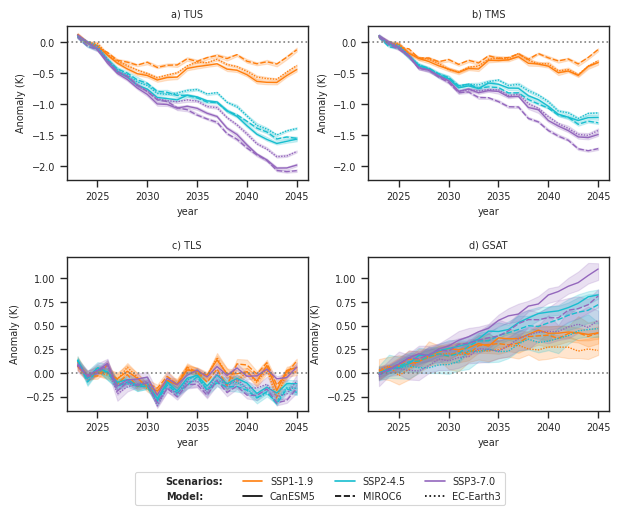

In [8]:
#This is for ploting all models
sns.set_context("paper")

h_plot = 2
v_plot = 2
x_text = -0.4
y_text = 0.19
text_size = 7

X_var = 'year'
Y_var = 'Anomaly (K)'
hue_var = 'Scenarios'
style_var = 'Model'
xlabel_var = 'year'
ylabel_var = 'Anomaly (K)'

height = ['a) TUS', 'b) TMS', 'c) TLS', 'd) GSAT']
# model = 'CanESM5'
model_df = anomaly_data.loc[(anomaly_data['year'] > 2022) & (anomaly_data['year'] <= 2045)].reset_index(drop = True)

fig, ax = plt.subplots(v_plot, h_plot, figsize=(7.0, 5))

k = 0

for j in range(v_plot):
    for i in range(h_plot):
        hight_df = model_df.loc[model_df['height'] == height[k].split(' ')[1]]
        sns.lineplot(data = hight_df, 
                     x = X_var, y = Y_var, hue = hue_var, 
                     ax = ax[j,i], style = style_var,
                     style_order = model_df.sort_values(['Model'])['Model'].unique(),
                     # hue_order = models,
                     lw = 1.0,
                     palette = color_models,
                     errorbar=('ci', 100), estimator='median'
                    )
        ax[j,i].legend([], [], frameon=False)
        ax[j,i].tick_params(axis='x', labelsize = text_size)
        ax[j,i].tick_params(axis='y', labelsize = text_size)
        ax[j,i].set_xlabel(xlabel_var, fontsize=text_size, fontfamily='sans-serif')
        ax[j,i].set_title(height[k], fontsize=text_size, fontfamily='sans-serif')
        ax[j,i].set_ylabel(ylabel_var, fontsize=text_size, fontfamily='sans-serif')
        ax[j,i].axhline(y = 0, ls = 'dotted', c = 'gray')
        k = k +1
       
# ########################################################################### 

for j in range(v_plot):
    for i in range(h_plot):
        y_lim = ax[j,i].get_ylim()
        if (i == 0):
            y_min = y_lim[0]
            y_max = y_lim[1]
        else:
            if (y_min > y_lim[0]): y_min = y_lim[0]
            if (y_max < y_lim[1]): y_max = y_lim[1]
    for i in range(h_plot):
        ax[j,i].set_ylim(y_min, y_max)


legend_patches = []
index = [0,4,1,5,2,6,3,7]

for i in index:
    label, color, style  = legend_pars.iloc[i]
    line = Line2D([0], [0], linestyle=style, color=color, label = label)
    legend_patches.append(line)
    
legend =  plt.legend(handles=legend_patches, loc='upper center', 
           bbox_to_anchor=(-0.2, -0.4), 
           borderaxespad=0, 
           ncol=4, 
           fontsize=text_size,
          
           )
legend.get_texts()[0].set_fontweight('bold')
legend.get_texts()[1].set_fontweight('bold')

plt.subplots_adjust(hspace=0.5, wspace = 0.25) 
plt.savefig(f'../Plots/TS_anomaly.png', 
            bbox_inches='tight',  dpi = 800,)
